# Prevendo doença do coração

Objetivo: Tentando prever o output negativo ou positivo para doença do coração usando naive bayes.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix
import graphviz
from sklearn.tree import export_graphviz

# Analise exploratória

In [2]:
dados = pd.read_csv("./dados/heart.csv")

In [3]:
# Contagem de nulos
dados.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
# informações dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# resumo estatistico dos dados numericos
dados.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# formato da tabela
dados.shape

(303, 14)

# Preparando dados para o modelo

In [7]:
# conjunto para previsão (X)
dados_previsao = dados.iloc[:, 0:13]
dados_previsao

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
# variavel dependente (y)
classe = dados.iloc[:, 13]
classe

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [9]:
# separação de teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split(dados_previsao, classe, test_size=.3, random_state=0)


# Treinando modelo 

In [10]:
# modelo usado
modelo_de_arvore_de_decisao = DecisionTreeClassifier()
modelo_de_arvore_de_decisao.fit(X_treino, y_treino)

DecisionTreeClassifier()

# Conferindo o modelo 

In [11]:
# previsoes do modelo
previsoes_do_modelo = modelo_de_arvore_de_decisao.predict(X_teste)
previsoes_do_modelo

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [12]:
# taxa de acerto
taxa_acerto = accuracy_score(y_teste, previsoes_do_modelo)
taxa_acerto # comparado ao naive bayes perdeu quase 10% de desempenho

0.7142857142857143

In [13]:
# comparando as previsoes com os outputs reais 
matriz_de_confusao = confusion_matrix(y_teste, previsoes_do_modelo)
matriz_de_confusao

array([[33, 11],
       [15, 32]], dtype=int64)

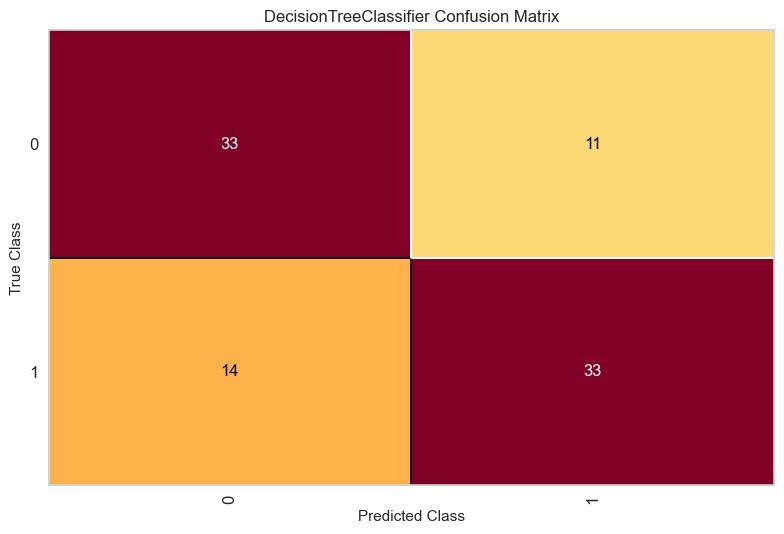

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
grafico = ConfusionMatrix(DecisionTreeClassifier())
grafico.fit(X_treino, y_treino)
grafico.score(X_teste, y_teste)
grafico.poof()

In [15]:
export_graphviz(modelo_de_arvore_de_decisao, out_file="./dados/arvore.dot")